In [218]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

In [148]:
cat = cv.imread("cat.jpg")
cat = cv.cvtColor(cat, cv.COLOR_BGR2RGB)

In [149]:
image_ai = cv.imread('jesusai.jpg')
image_ai = cv.cvtColor(image_ai, cv.COLOR_BGR2RGB)

In [153]:
hanzi = cv.imread('hanyu.jpg')
hanzi = cv.cvtColor(hanzi, cv.COLOR_BGR2RGB)

In [82]:
def show_image(picture):
    plt.figure(figsize=(8, 6))
    plt.imshow(picture)
    plt.axis('off')
    plt.show()

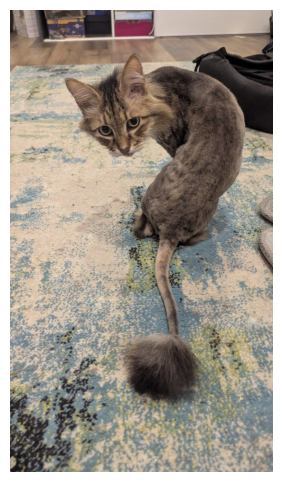

In [83]:
show_image(cat)

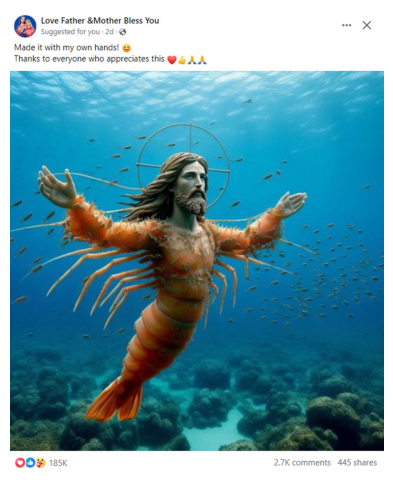

In [84]:
show_image(image_ai)

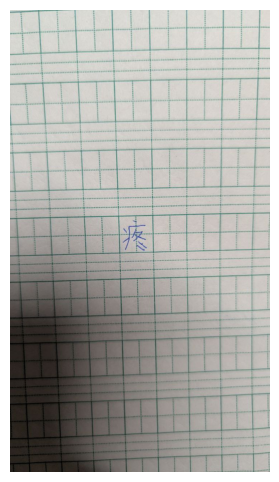

In [85]:
show_image(hanzi)

### Поворот изображения

In [86]:
height, width = cat.shape[:2]
center = (height// 2 ,  width//2)
angel = 90
scale  = 1.0

In [87]:
rotation_matrix = cv.getRotationMatrix2D(center, angel, scale)

In [88]:
rotate_cat = cv.warpAffine(cat, rotation_matrix, (width, height))

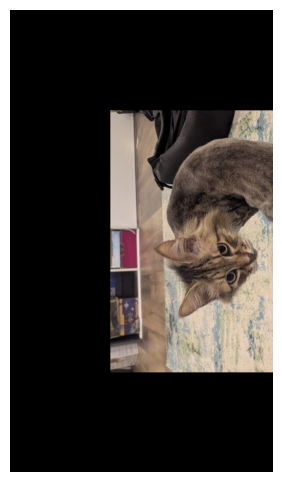

In [89]:
show_image(rotate_cat)

### Изменения масштаба изображений

In [90]:
height, width = image_ai.shape[:2]
center = (height// 2 ,  width//2)
angel = 0
scale  = 2.0

In [91]:
rotation_matrix = cv.getRotationMatrix2D(center, angel, scale)
rotate_jes = cv.warpAffine(image_ai, rotation_matrix, (width, height))

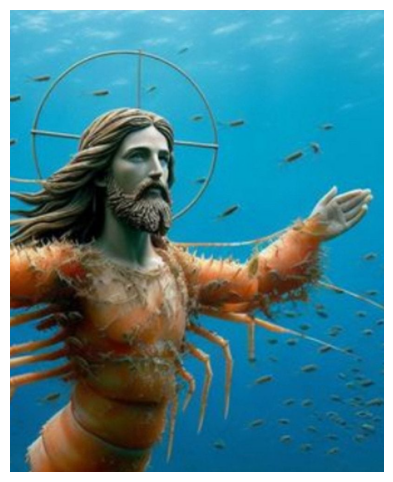

In [92]:
show_image(rotate_jes)

### Сдвиг изображения

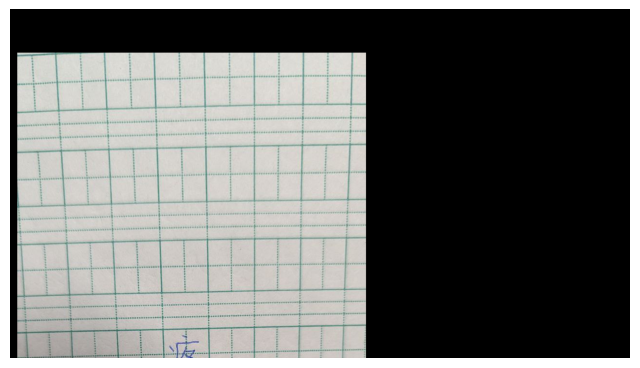

In [93]:
tx, ty = 15, 90
translation_matrix = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])
height, width = hanzi.shape[:2]
translated_image = cv.warpAffine(hanzi, translation_matrix, (height, width))

show_image(translated_image)

### Проективные преобразования

### Отражение относительно горизонтали

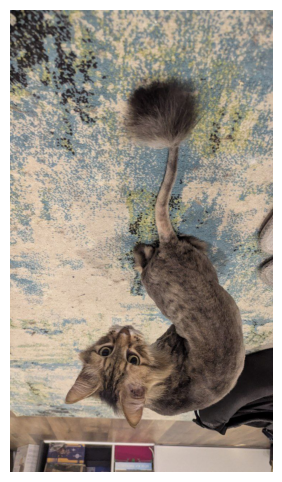

In [94]:
show_image(cat[::-1])

### Конвертируем изображения в HSV

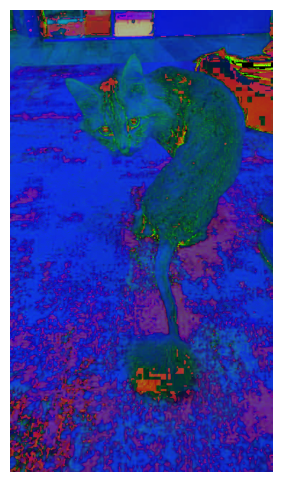

In [95]:
hsv_cat = cv.cvtColor(cat,cv.COLOR_RGB2HSV)
plt.figure(figsize=(8, 6))
plt.imshow(hsv_cat)
plt.axis('off')
plt.show()

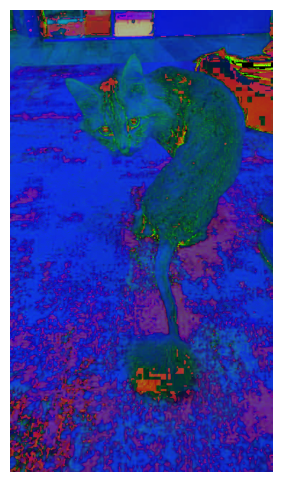

In [71]:
hsv_cat = cv.cvtColor(cat,cv.COLOR_BGR2HSV)
plt.figure(figsize=(8, 6))
plt.imshow(hsv_cat)
plt.axis('off')
plt.show()

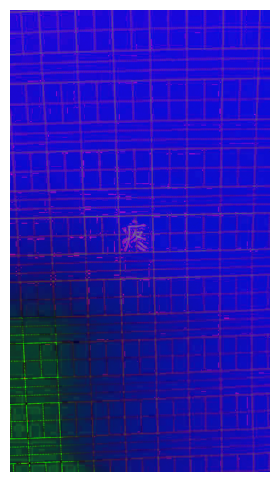

In [96]:
image_hany= cv.cvtColor(hanzi,cv.COLOR_RGB2HSV)
plt.figure(figsize=(8, 6))
plt.imshow(image_hany)
plt.axis('off')
plt.show()

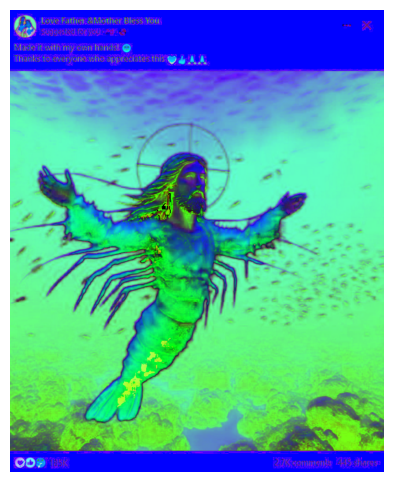

In [147]:
image_ai_hsv= cv.cvtColor(image_ai,cv.COLOR_RGB2HSV)
plt.figure(figsize=(8, 6))
plt.imshow(image_ai)
plt.axis('off')
plt.show()

### Gray binarization

In [169]:
def get_binirize_image(image):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

    threshold1, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)

    adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11, 3)
    adaptive_gausin_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,15, 9)
    
    threshold, otsu = cv.threshold(gray, 150, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(thresh, cmap='gray')
    axes[0, 1].set_title('Thresh binary')
    axes[0, 1].axis('off')

    axes[0, 2].imshow(thresh_inv, cmap='gray')
    axes[0, 2].set_title('Inverse thresh binary')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(adaptive_thresh, cmap='gray')
    axes[1, 0].set_title('ADAPTIVE_THRESH_MEAN')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(adaptive_gausin_thresh, cmap='gray')
    axes[1, 1].set_title('ADAPTIVE_THRESH_GAUSSIAN')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(otsu, cmap='gray')
    axes[1, 2].set_title('THRESH_BINARY + THRESH_OTSU')
    axes[1, 2].axis('off')
    
    

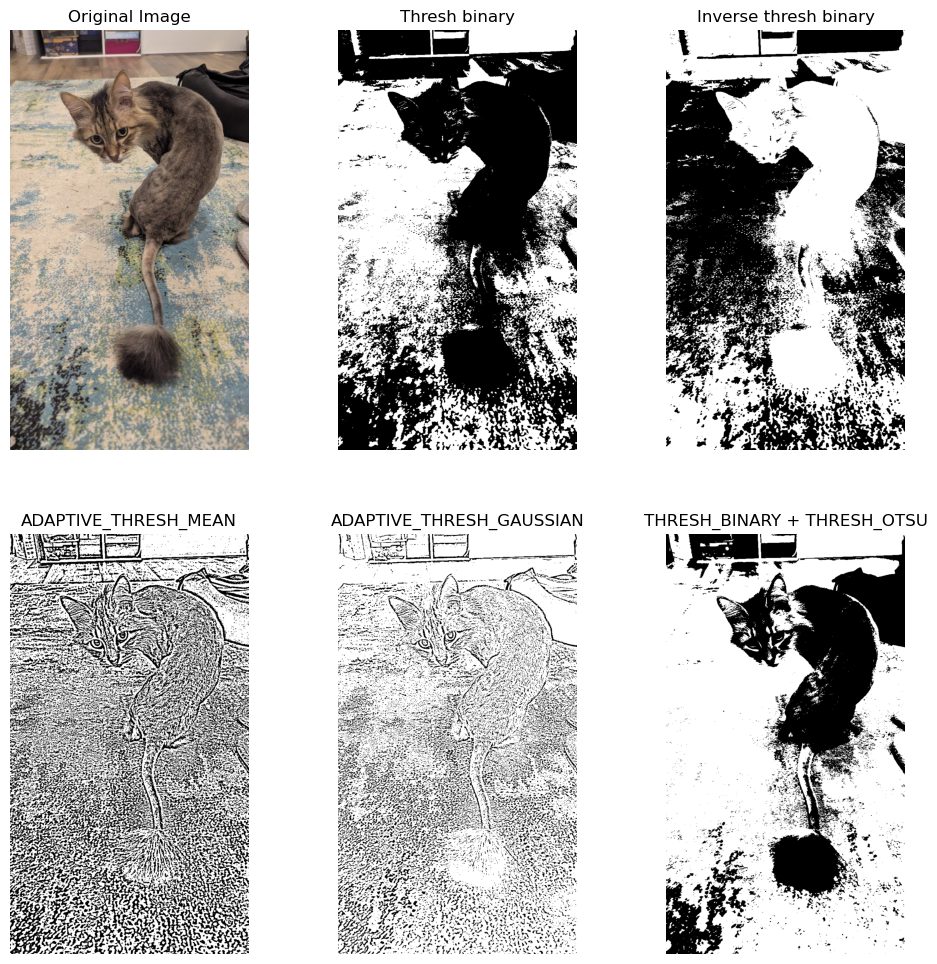

In [170]:
get_binirize_image(cat)

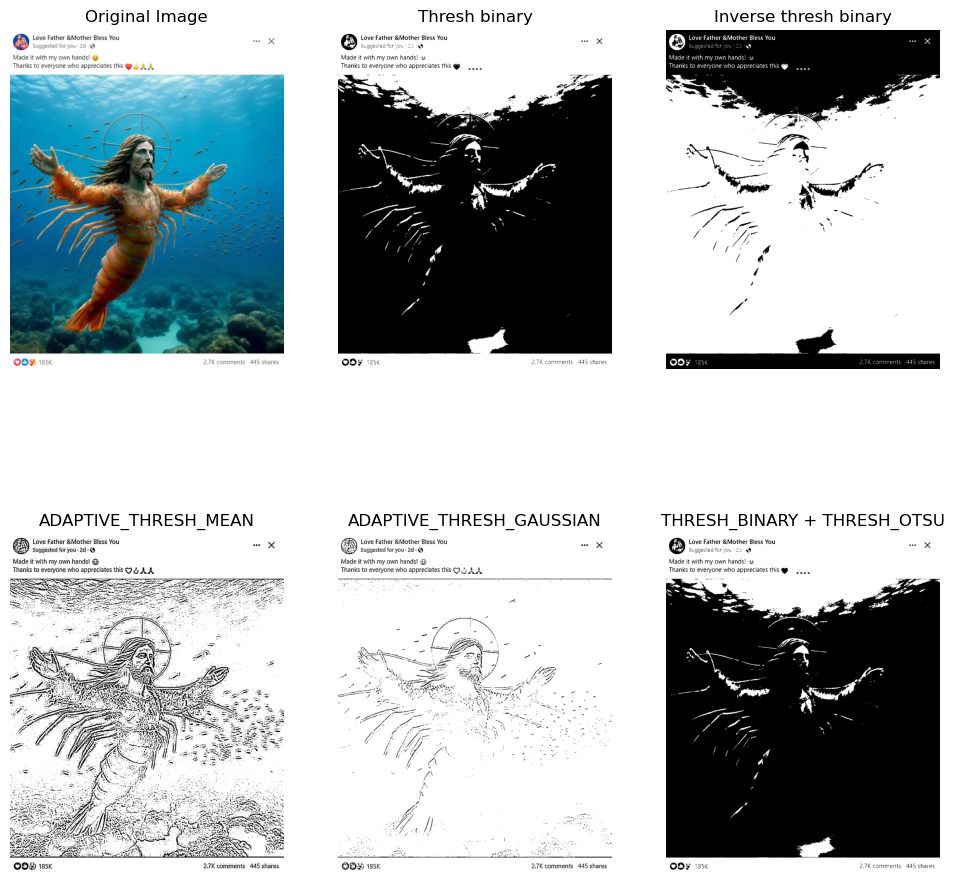

In [171]:
get_binirize_image(image_ai)

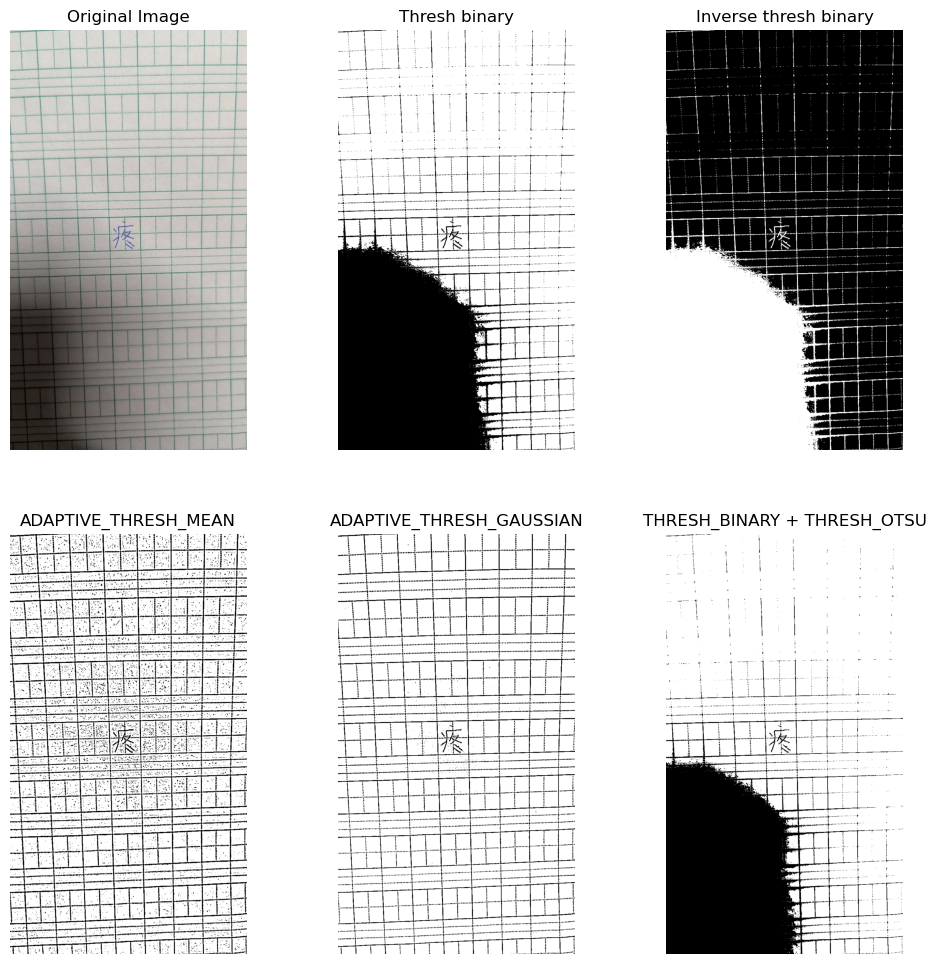

In [172]:
get_binirize_image(hanzi)

### Image Filtering

In [214]:
def filter_image(image):
    
    blur = cv.blur(image, (10, 10))
    gauss_blur =  cv.GaussianBlur(image, (9,9), 0)
    median_blur = cv.medianBlur(image, 9)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(blur)
    axes[0, 1].set_title('avereging')
    axes[0, 1].axis('off')
    
    axes[1, 0].imshow(gauss_blur)
    axes[1, 0].set_title('gauss blur')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(median_blur)
    axes[1, 1].set_title('median blur')
    axes[1, 1].axis('off')


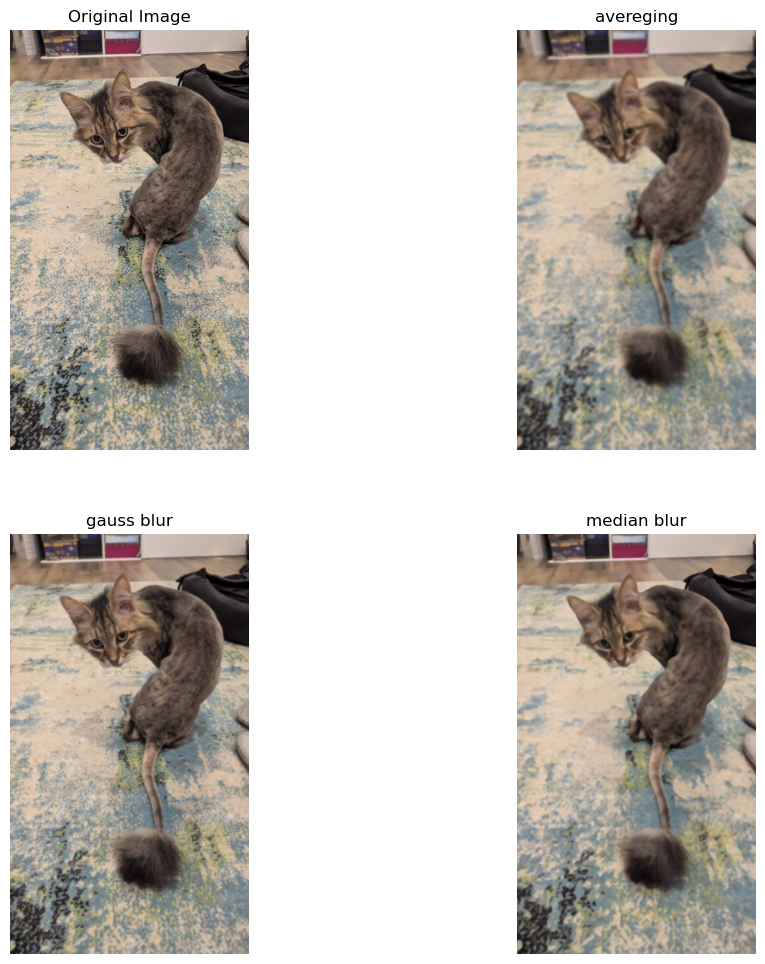

In [215]:
filter_image(cat)

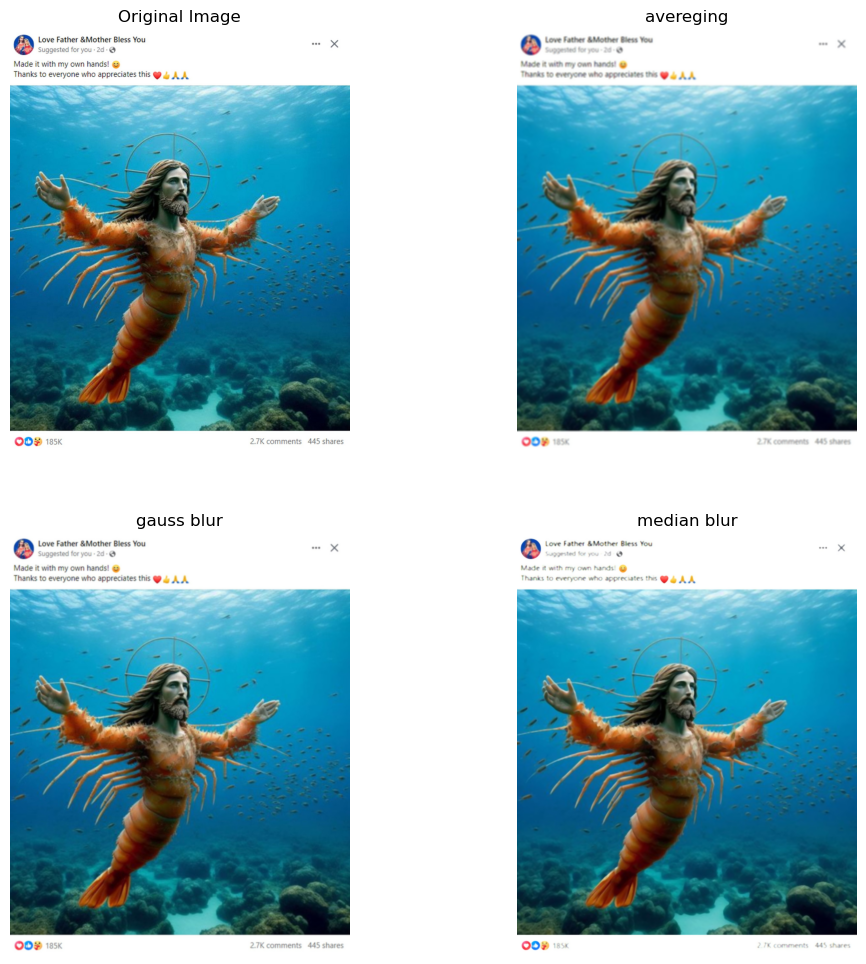

In [216]:
filter_image(image_ai)

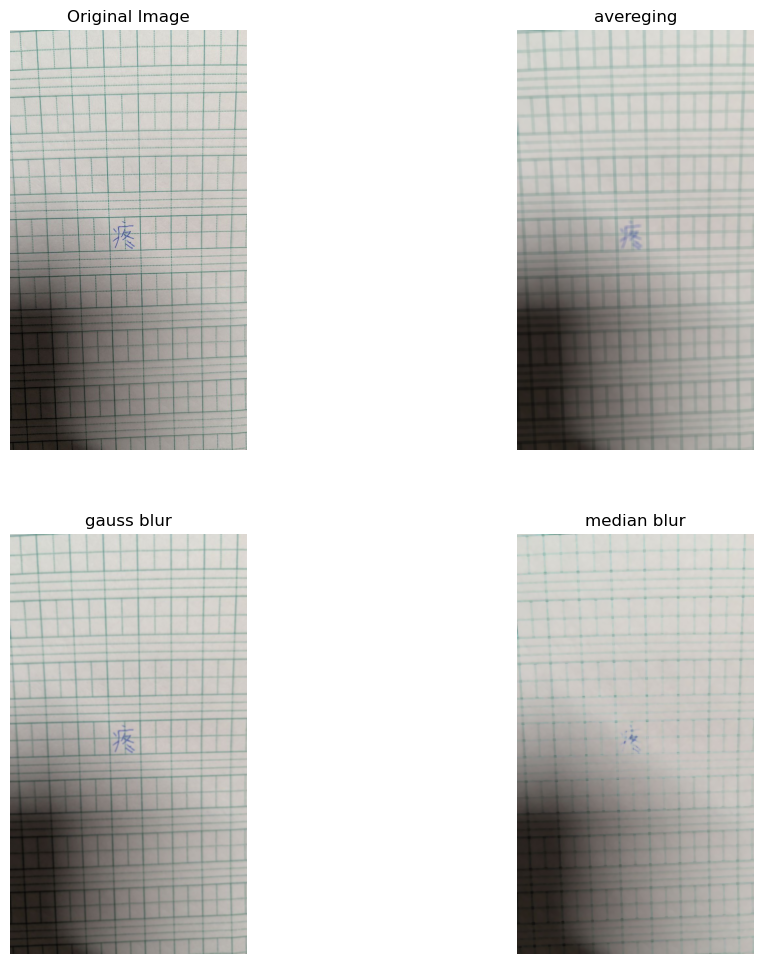

In [217]:
filter_image(hanzi)

### Добавим шуму

In [225]:
def add_salt_pepper(picture):
    height, width = picture.shape[:2]
    number_pixels = random.randint(1000, 20000)
    for i in range(number_pixels):
        h_coord = random.randint(0, height-1)
        w_coord = random.randint(0, width-1)
        
        picture[h_coord][w_coord] = 255
        
    height, width = picture.shape[:2]
    number_pixels = random.randint(1000, 20000)
    for i in range(number_pixels):
        h_coord = random.randint(0, height-1)
        w_coord = random.randint(0, width-1)
        
        picture[h_coord][w_coord] = 0
    return picture

In [229]:
def add_noise(picture):
    height, width = picture.shape[:2]
    number_pixels = random.randint(height* width)
    for i in range(number_pixels):
        h_coord = random.randint(0, height-1)
        w_coord = random.randint(0, width-1)
        
        picture[h_coord][w_coord] = 255
        
    height, width = picture.shape[:2]
    number_pixels = random.randint(1000, 20000)
    for i in range(number_pixels):
        h_coord = random.randint(0, height-1)
        w_coord = random.randint(0, width-1)
        
        picture[h_coord][w_coord] = 0
    return picture

In [236]:
np.random.normal()

0.7104835269138887